In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


Importing plotly failed. Interactive plots will not work.


In [2]:
#Prepare the data
df = pd.read_csv('MLTempDataset.csv')
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(df['Datetime'])
df_prophet['y'] = df['DAYTON_MW']
df_prophet

,ds,y
0,2022-01-04 00:00:00,20.867
1,2022-01-04 01:00:00,21.000
2,2022-01-04 02:00:00,20.867
3,2022-01-04 03:00:00,20.650
4,2022-01-04 04:00:00,20.400
...,...,...
6671,2022-10-08 23:00:00,27.350
6672,2022-10-09 00:00:00,26.800
6673,2022-10-09 01:00:00,26.450
6674,2022-10-09 02:00:00,25.900


In [3]:
#Create and fit the Prophet model
m = Prophet()
m.fit(df_prophet)

11:05:06 - cmdstanpy - INFO - Chain [1] start processing
11:05:07 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
#Create future df for predictions
future = m.make_future_dataframe(periods=365)

In [5]:
#Make predictions
forecast = m.predict(future)

In [6]:
#Review forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

                      ds       yhat  yhat_lower  yhat_upper
7036 2023-10-05 03:00:00  29.832924  -21.831317   78.600721
7037 2023-10-06 03:00:00  31.508376  -22.873760   81.136729
7038 2023-10-07 03:00:00  30.167641  -22.414610   79.723303
7039 2023-10-08 03:00:00  29.420967  -25.715777   79.085548
7040 2023-10-09 03:00:00  28.794049  -25.015590   80.745771


C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


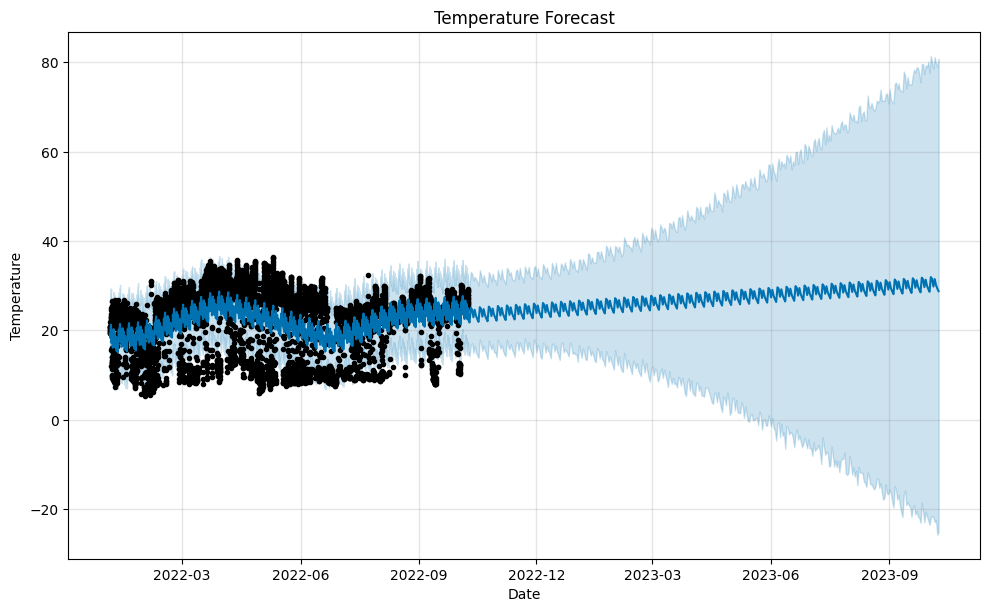

In [7]:
#Plot the forecast
fig1 = m.plot(forecast)
plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime obje

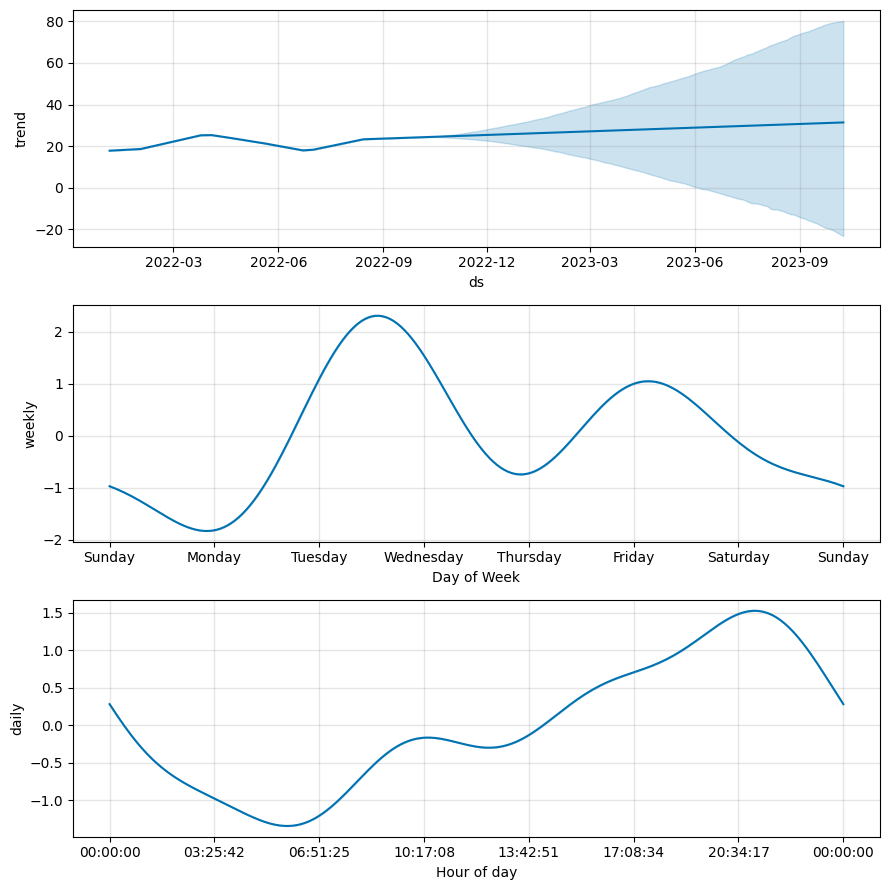

In [8]:
# Plot the forecast components
fig2 = m.plot_components(forecast)
plt.show()